In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# 假设IMDb数据已经保存为imdb_top250.csv
df_douban = pd.read_csv("data/douban_top250.csv")
df_imdb = pd.read_csv("data/imdb_top_250_movies.csv")

Douban average rating: 9.37
IMDb average rating: 8.82


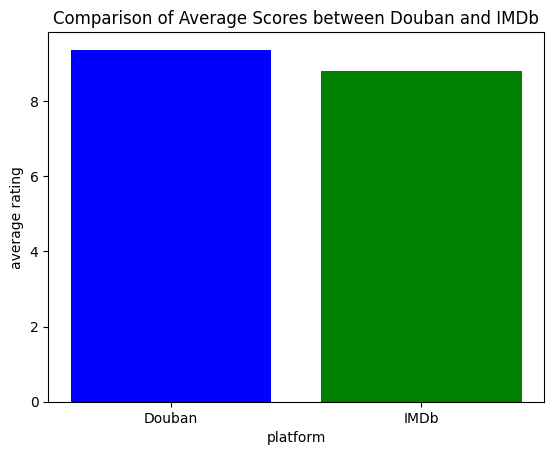

In [18]:
average_rating_douban = df_douban['rating'].mean()
average_rating_imdb = df_imdb['rating'].mean()

print(f"Douban average rating: {average_rating_douban:.2f}")
print(f"IMDb average rating: {average_rating_imdb:.2f}")

plt.bar(['Douban', 'IMDb'], [average_rating_douban, average_rating_imdb], color=['blue', 'green'])
plt.xlabel('platform')
plt.ylabel('average rating')
plt.title('Comparison of Average Scores between Douban and IMDb')
plt.show()

The number of overlapping movies: 0


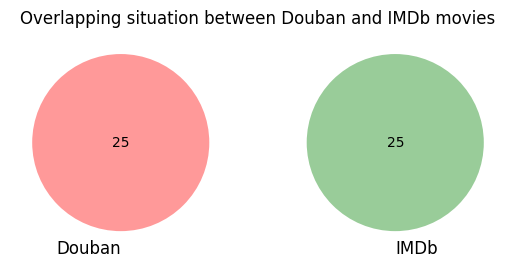

In [19]:
overlap_movies = pd.merge(df_douban, df_imdb, on='movie_title', how='inner')
print("The number of overlapping movies:", len(overlap_movies))

venn2(subsets=(len(df_douban), len(df_imdb), len(overlap_movies)), set_labels=('Douban', 'IMDb'))
plt.title('Overlapping situation between Douban and IMDb movies')
plt.show()

/tmp/ipykernel_377267/1127986889.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='origin')


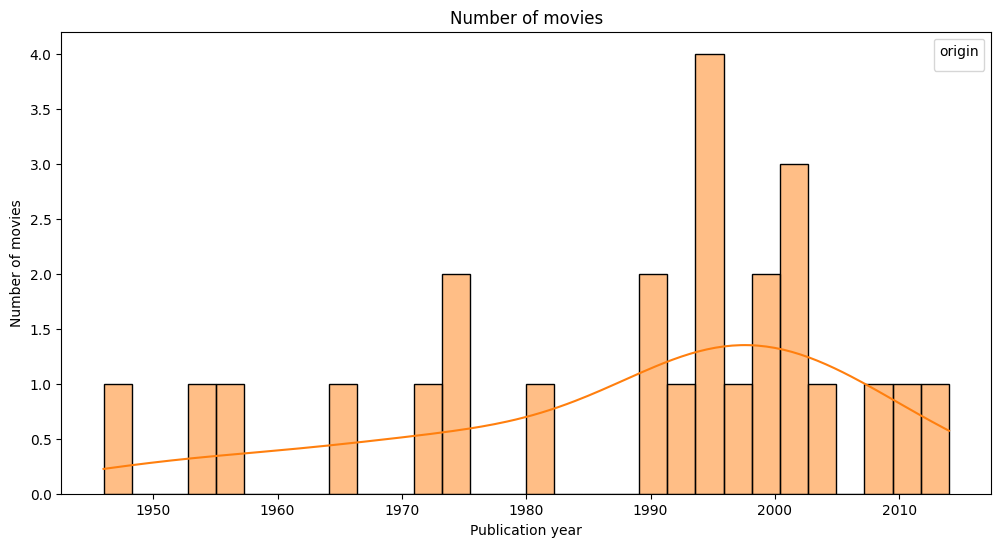

In [22]:
# 合并两个数据集
combined_df = pd.concat([df_douban, df_imdb], keys=['Douban', 'IMDb']).reset_index(level=0).rename(columns={'level_0': 'Source'})

# 绘制发布年份分布图
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='year', hue='Source', bins=30, kde=True, multiple="stack")
plt.xlabel('Publication year')
plt.ylabel('Number of movies')
plt.title('Number of movies')
plt.legend(title='origin')
plt.show()